In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics, regularizers

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 100)

In [110]:
df = pd.read_csv('2000-2018_disasters_min50k_for_modeling.csv')
df.drop(columns = ['BEGIN_DATE_TIME','END_DATE_TIME','BEGIN_TIME','END_TIME'], inplace = True)
df.head()

,STATE,CZ_TYPE,EVENT_TYPE,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_RANGE,BEGIN_AZIMUTH,END_RANGE,END_AZIMUTH,MAGNITUDE_TYPE,MAGNITUDE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEAR,BEGIN_MONTH,BEGIN_DAY,END_MONTH,END_DAY,DURATION_DAYS,DURATION_HOURS,DURATION_MINUTES,TOTAL_DURATION_HR,DISTANCE_COVERED(KM),BEGIN_HOUR,BEGIN_MINUTE,END_HOUR,END_MINUTE
0,MISSOURI,C,Thunderstorm Wind,CST,3,0,0,0,250000.0,0.0,1.0,E,0.0,N,E,83.0,37.25,-89.67,37.30,-89.53,2000,1,3,1,3,0,0,10,0.2,16.651331,8,50,9,0
1,ILLINOIS,C,Thunderstorm Wind,CST,0,0,0,0,150000.0,0.0,2.0,NE,4.0,NE,E,100.0,37.73,-89.18,37.75,-89.17,2000,1,3,1,3,0,0,4,0.1,4.535308,9,18,9,22
2,ILLINOIS,C,Thunderstorm Wind,CST,0,0,0,0,100000.0,0.0,1.0,S,4.0,NE,E,75.0,37.78,-89.12,37.78,-89.12,2000,1,3,1,3,0,0,2,0.0,0.000000,9,22,9,24
3,INDIANA,C,Thunderstorm Wind,CST,0,0,0,0,100000.0,0.0,0.0,E,0.0,E,E,65.0,37.98,-87.55,37.98,-87.55,2000,1,3,1,3,0,0,0,0.0,0.000000,12,10,12,10
4,ILLINOIS,C,Thunderstorm Wind,CST,0,0,0,0,100000.0,0.0,0.0,E,1.0,E,E,87.0,37.73,-88.93,37.73,-88.93,2000,1,3,1,3,0,0,0,0.0,0.000000,14,7,14,7


In [111]:
df.shape

(11047, 34)

In [112]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_RANGE,END_RANGE,MAGNITUDE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,YEAR,BEGIN_MONTH,BEGIN_DAY,END_MONTH,END_DAY,DURATION_DAYS,DURATION_HOURS,DURATION_MINUTES,TOTAL_DURATION_HR,DISTANCE_COVERED(KM),BEGIN_HOUR,BEGIN_MINUTE,END_HOUR,END_MINUTE,STATE_ARIZONA,STATE_ARKANSAS,STATE_ATLANTIC NORTH,STATE_ATLANTIC SOUTH,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT OF COLUMBIA,STATE_E PACIFIC,STATE_FLORIDA,STATE_GEORGIA,STATE_GULF OF MEXICO,STATE_HAWAII,STATE_IDAHO,STATE_ILLINOIS,STATE_INDIANA,STATE_IOWA,STATE_KANSAS,STATE_KENTUCKY,STATE_LAKE MICHIGAN,STATE_LAKE ST CLAIR,STATE_LOUISIANA,...,EVENT_TYPE_Marine High Wind,EVENT_TYPE_Marine Strong Wind,EVENT_TYPE_Marine Thunderstorm Wind,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado,CZ_TIMEZONE_CST,CZ_TIMEZONE_CST-6,CZ_TIMEZONE_EST,CZ_TIMEZONE_EST-5,CZ_TIMEZONE_HST,CZ_TIMEZONE_MST,CZ_TIMEZONE_MST-7,CZ_TIMEZONE_PST,CZ_TIMEZONE_PST-8,BEGIN_AZIMUTH_ENE,BEGIN_AZIMUTH_ESE,BEGIN_AZIMUTH_N,BEGIN_AZIMUTH_NE,BEGIN_AZIMUTH_NNE,BEGIN_AZIMUTH_NNW,BEGIN_AZIMUTH_NW,BEGIN_AZIMUTH_S,BEGIN_AZIMUTH_SE,BEGIN_AZIMUTH_SSE,BEGIN_AZIMUTH_SSW,BEGIN_AZIMUTH_SW,BEGIN_AZIMUTH_W,BEGIN_AZIMUTH_WNW,BEGIN_AZIMUTH_WSW,END_AZIMUTH_ENE,END_AZIMUTH_ESE,END_AZIMUTH_N,END_AZIMUTH_NE,END_AZIMUTH_NNE,END_AZIMUTH_NNW,END_AZIMUTH_NW,END_AZIMUTH_S,END_AZIMUTH_SE,END_AZIMUTH_SSE,END_AZIMUTH_SSW,END_AZIMUTH_SW,END_AZIMUTH_W,END_AZIMUTH_WNW,END_AZIMUTH_WSW,MAGNITUDE_TYPE_EG,MAGNITUDE_TYPE_ES,MAGNITUDE_TYPE_HA,MAGNITUDE_TYPE_M,MAGNITUDE_TYPE_MG,MAGNITUDE_TYPE_MS
0,3,0,0,0,250000.0,0.0,1.0,0.0,83.0,37.25,-89.67,37.30,-89.53,2000,1,3,1,3,0,0,10,0.2,16.651331,8,50,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,150000.0,0.0,2.0,4.0,100.0,37.73,-89.18,37.75,-89.17,2000,1,3,1,3,0,0,4,0.1,4.535308,9,18,9,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,100000.0,0.0,1.0,4.0,75.0,37.78,-89.12,37.78,-89.12,2000,1,3,1,3,0,0,2,0.0,0.000000,9,22,9,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,100000.0,0.0,0.0,0.0,65.0,37.98,-87.55,37.98,-87.55,2000,1,3,1,3,0,0,0,0.0,0.000000,12,10,12,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,100000.0,0.0,0.0,1.0,87.0,37.73,-88.93,37.73,-88.93,2000,1,3,1,3,0,0,0,0.0,0.000000,14,7,14,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
X = df.drop(columns = ['INJURIES_DIRECT','INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT','DAMAGE_PROPERTY','DAMAGE_CROPS'])
y = df['DAMAGE_PROPERTY']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Predicting `DAMAGE_PROPERTY`

## Random Forest

In [33]:
params = {'n_estimators': [250, 300, 350],
          'max_depth': [30,40,50],
          'max_features': [40,50]}
rf = RandomForestRegressor(n_jobs = -1) 
rfr = GridSearchCV(rf, params, cv=5)
rfr.fit(X_train, y_train)
rfr.best_params_

{'max_depth': 50, 'max_features': 40, 'n_estimators': 250}

In [34]:
rfr.score(X_train, y_train)

0.8901955430105026

In [35]:
rfr.score(X_test, y_test)

-0.028212772371520648

# NN with Keras

In [125]:
model = Sequential()

# adding one hidden layer with 20 neurons 
model.add(Dense(100, activation = 'relu', input_dim = X_train.shape[1]))

# adding another layer with 20 nodes
model.add(Dense(50, activation = 'relu'))

model.add(Dropout(0.5))

# output layer
model.add(Dense(1, activation = None))

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 1000, verbose = 0)

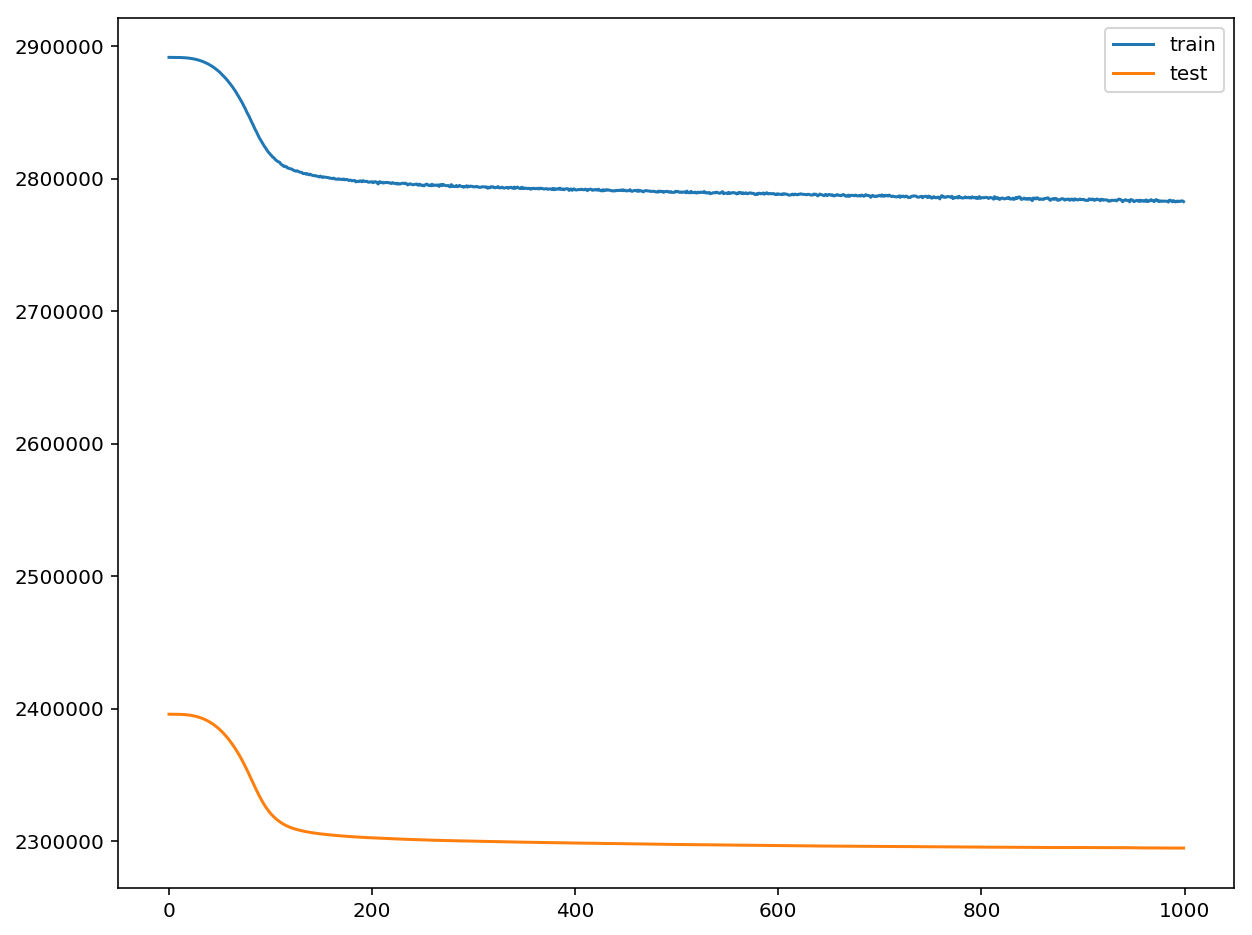

In [127]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend();